In [540]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(level=logging.INFO)

# Load Dataset

In [541]:
from sklearn.datasets.california_housing import fetch_california_housing

housing = fetch_california_housing(download_if_missing=False)

features, labels  = housing['data'], housing['target']
col_names = housing['feature_names']

X = pd.DataFrame(features, columns=col_names)
y = pd.DataFrame(labels, columns=['target'])

In [523]:
X.sample(5).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15818,1.6500,52.0,2.532203,1.033898,1630.0,2.762712,37.76,-122.42
5929,4.8125,16.0,5.439462,0.955157,1319.0,2.957399,34.12,-117.79
15796,2.5403,52.0,3.663943,1.052094,2259.0,2.307457,37.76,-122.42
9043,4.6629,12.0,6.827985,1.123235,2439.0,3.130937,34.68,-118.12
13944,5.7421,16.0,17.322917,2.963542,527.0,2.744792,34.28,-117.21


In [524]:
y.sample(5)

,target
17484,1.984
4637,1.875
488,2.417
9731,2.299
12465,1.420


# Linear Regression

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [526]:
features_train, features_test, labels_train, labels_test = train_test_split(
                                        X, y, test_size=0.25, random_state=42)

In [527]:
reg = LinearRegression(normalize=True, n_jobs=-1)
reg.fit(features_train, labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [528]:
reg.intercept_

array([-37.02782759])

In [529]:
reg.coef_

array([[ 4.47600069e-01,  9.56752596e-03, -1.24755956e-01,
         7.94471254e-01, -1.43902596e-06, -3.44307993e-03,
        -4.18555257e-01, -4.33405135e-01]])

In [542]:
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [530]:
importances = pd.DataFrame(sorted(list(zip(reg.coef_[0], col_names)), key= lambda x : x[0], reverse=True), 
                           columns=['coefs','col_names'])

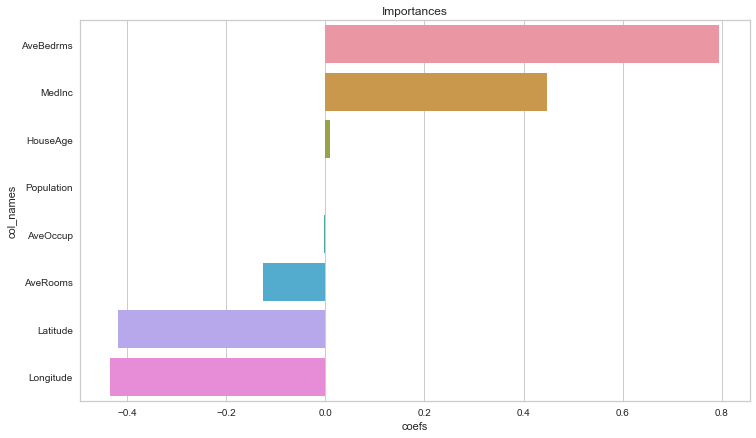

In [538]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.barplot(importances.coefs,importances.col_names, orient='h', ax=ax, )
plt.title('Importances')
plt.show()

# Partial Dependence Plot

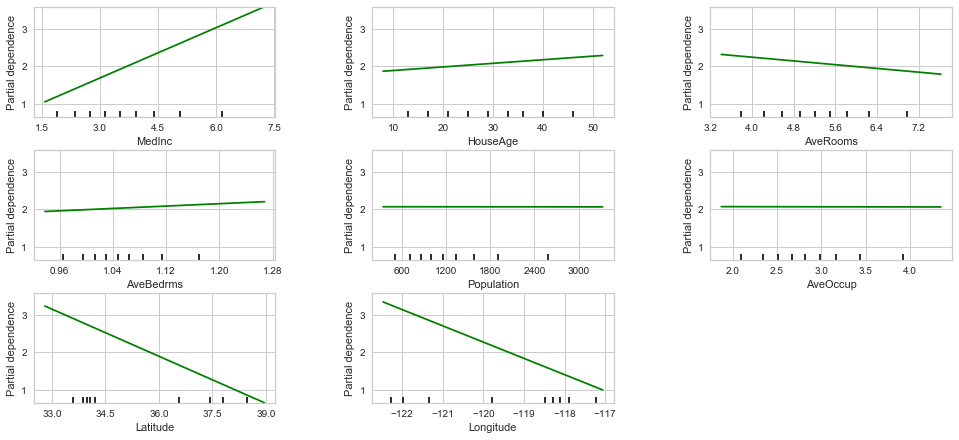

In [539]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence


fig, ax = plt.subplots(1,1, figsize=(15,10))
plot_partial_dependence(reg, features_test, features = X.columns, feature_names=col_names,
                            n_jobs=-1, grid_resolution=50, fig = fig)
plt.show()

# Decision Tree 

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
reg = DecisionTreeRegressor()
reg.fit(features_train, labels_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(features_train, labels_train)

/Library/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

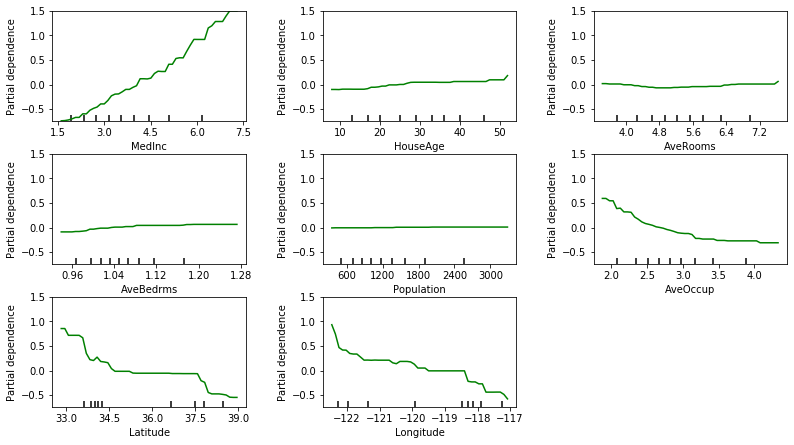

In [128]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

plot_partial_dependence(reg, X, features = X.columns, feature_names=col_names,
                             n_jobs=-1, grid_resolution=50, fig = fig)

plt.show()

# Bike Sharing Example

## Target: Registered 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
df = pd.read_csv('bike/bike_sharing_daily.csv')

In [205]:
X = df.drop(['cnt','instant','dteday','registered','casual'], axis=1)
y = df.registered

In [206]:
features_train, features_test, labels_train, labels_test = train_test_split(
                                        X, y, test_size=0.25, random_state=42)

reg = RandomForestRegressor(n_estimators=100, max_depth=6)
reg.fit(features_train, labels_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [207]:
importances = pd.DataFrame(list(zip(reg.feature_importances_, features_train.columns)), columns=['importances','col_names']).sort_values(by='importances', ascending=False)

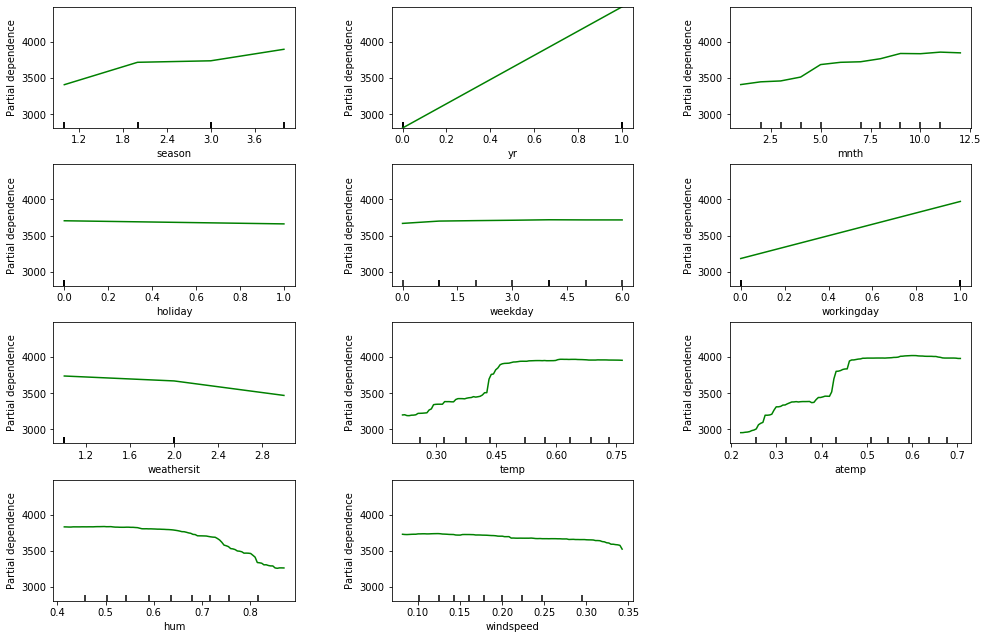

,importances,col_names
1,0.334692,yr
8,0.182023,atemp
7,0.152247,temp
0,0.089354,season
5,0.081038,workingday
2,0.069947,mnth
9,0.049160,hum
10,0.022343,windspeed
6,0.011338,weathersit
4,0.005802,weekday


In [208]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

plot_partial_dependence(reg, 
                        features_train, 
                        features = list(features_train.columns), 
                        feature_names=list(X.columns),
                        n_jobs=-1, 
                        grid_resolution=100, fig = fig)

plt.show()
importances

## Casual

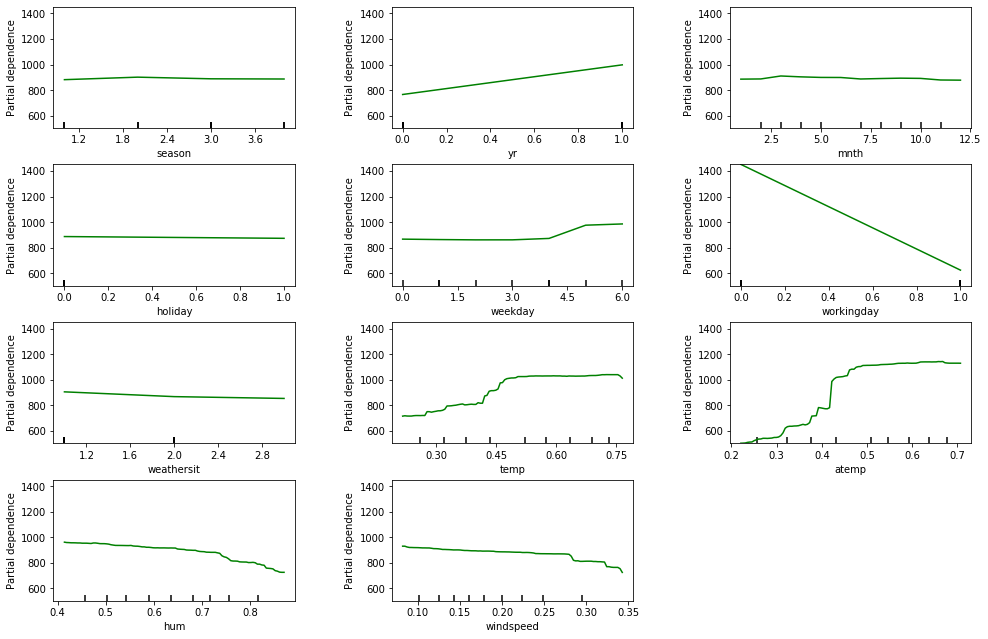

,importances,col_names
5,0.365521,workingday
8,0.288581,atemp
7,0.153669,temp
1,0.058003,yr
9,0.044276,hum
10,0.035543,windspeed
4,0.018567,weekday
2,0.015472,mnth
0,0.008394,season
6,0.007944,weathersit


In [209]:
X = df.drop(['cnt','instant','dteday','registered','casual'], axis=1)
y = df.casual

features_train, features_test, labels_train, labels_test = train_test_split(
                                        X, y, test_size=0.25, random_state=42)

reg = RandomForestRegressor(n_estimators=100, max_depth=6)
reg.fit(features_train, labels_train)

importances = pd.DataFrame(list(zip(reg.feature_importances_, features_train.columns)), columns=['importances','col_names']).sort_values(by='importances', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(15,15))

plot_partial_dependence(reg, 
                        features_train, 
                        features = list(features_train.columns), 
                        feature_names=list(X.columns),
                        n_jobs=-1, 
                        grid_resolution=100, fig = fig)

plt.show()
importances

# Adult dataset

In [219]:
from sklearn.ensemble import RandomForestClassifier




Feature | Description
-------|----------
`target`| >50K, <=50K.
`age` | continuous.
`workclass` | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
`fnlwgt` |continuous.
`education` | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
`education-num` | continuous.
`marital-status` | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
`occupation` | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
`relationship` | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
`race`| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
`sex`| Female, Male.
`capital-gain` | continuous.
`capital-loss` | continuous.
`hours-per-week` | continuous.
`native-country` | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [546]:
import shap

X, y = shap.datasets.adult()

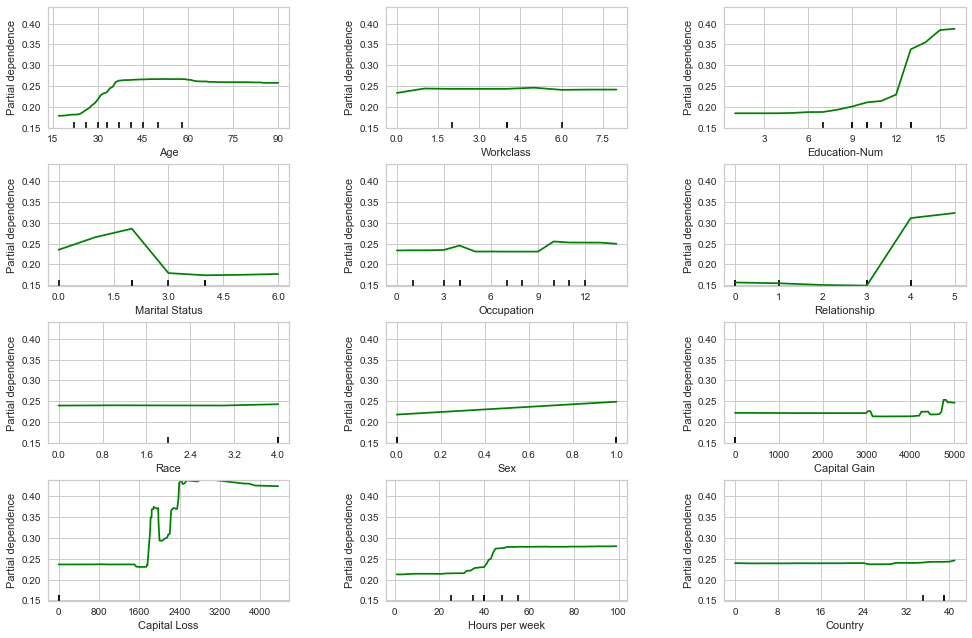

,importances,col_names
5,0.246278,Relationship
8,0.224740,Capital Gain
2,0.169069,Education-Num
3,0.149201,Marital Status
0,0.067786,Age
9,0.049273,Capital Loss
10,0.041662,Hours per week
7,0.023244,Sex
4,0.021849,Occupation
1,0.004211,Workclass


In [547]:
features_train, features_test, labels_train, labels_test = train_test_split(
                                        X, y, test_size=0.25, random_state=42)

reg = RandomForestClassifier(n_estimators=100, max_depth=6)
reg.fit(features_train, labels_train)

importances = pd.DataFrame(list(zip(reg.feature_importances_, features_train.columns)), columns=['importances','col_names']).sort_values(by='importances', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(15,15))

plot_partial_dependence(reg, 
                        features_train, 
                        features = list(features_train.columns), 
                        feature_names=list(X.columns),
                        n_jobs=-1, 
                        grid_resolution=100, fig = fig)

plt.show()
importances

# SHAP

In [548]:
shap.initjs()

In [549]:
def plot_log_odds(x=None):
    xs = np.linspace(-4,4,100)
    plt.figure(figsize=(12,6))
    plt.xlabel("Log odds")
    plt.ylabel("Probability of 1")
    plt.title('Probability of 1')
    plt.plot(xs, 1/(1+np.exp(-xs)))
    if x:
        y = 1/(1+np.exp(-x))
        plt.vlines(x, 0, 1, linestyles='--', color='red')
        plt.hlines( y, -4, 4, linestyles='-', color='black')
        plt.text(x+0.3, y+0.015, f'{y:.2f}', size=15)
    
    plt.show()



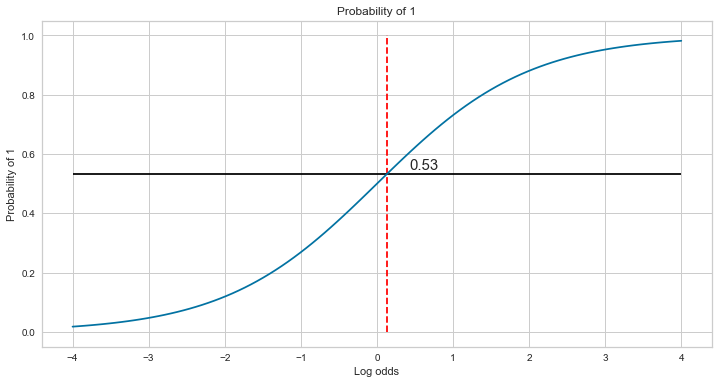

In [550]:
plot_log_odds(0.13)

In [551]:
import xgboost

In [552]:
model = xgboost.XGBClassifier(n_estimators=500, 
                              n_jobs=-1).fit(features_train, labels_train)

y_pred = model.predict(features_test)

In [553]:
from sklearn.metrics import roc_auc_score

In [556]:
roc_auc_score(labels_test, model.predict_proba(features_test)[:,1])

0.9298917238122932

In [555]:
roc_auc_score(labels_train, model.predict_proba(features_train)[:,1])

0.9398570100618319

In [380]:
from sklearn.metrics import classification_report

In [381]:
print(classification_report(labels_test, model.predict(features_test)))

              precision    recall  f1-score   support

       False       0.90      0.94      0.92      6214
        True       0.79      0.67      0.72      1927

    accuracy                           0.88      8141
   macro avg       0.84      0.81      0.82      8141
weighted avg       0.87      0.88      0.87      8141



In [560]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(features_test)

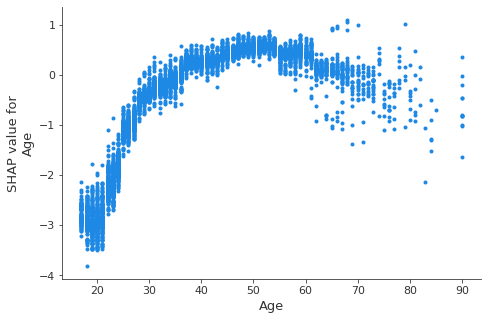

In [383]:
shap.dependence_plot('Age', shap_values, features_test, interaction_index=None)

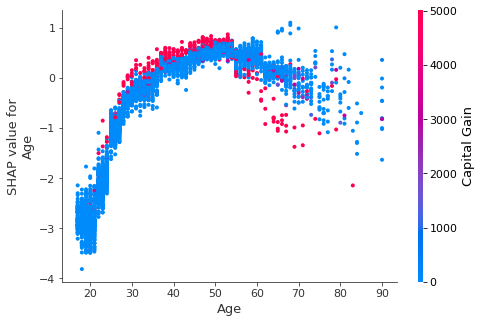

In [384]:
shap.dependence_plot('Age', shap_values, features_test)

In [335]:
%%time
interactions = explainer.shap_interaction_values(features_test)

CPU times: user 25.4 s, sys: 286 ms, total: 25.7 s
Wall time: 28.4 s


In [385]:
%%time
inds = shap.approximate_interactions("Age", shap_values, features_test)

CPU times: user 330 ms, sys: 2.72 ms, total: 332 ms
Wall time: 332 ms


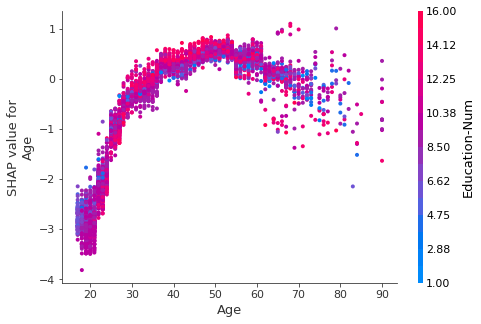

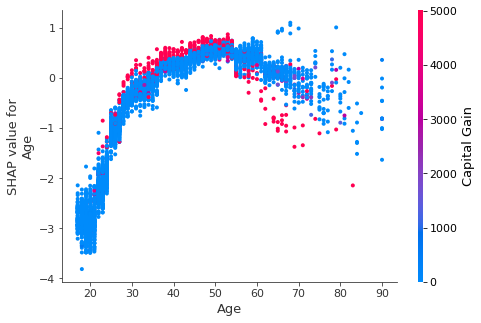

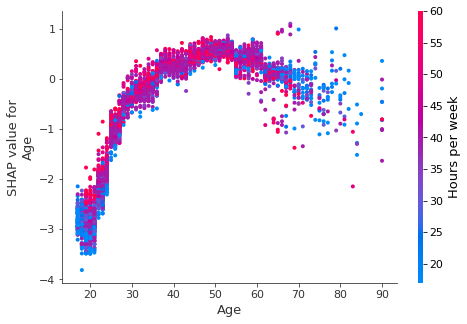

In [387]:
# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("Age", shap_values, features_test, interaction_index=inds[i])

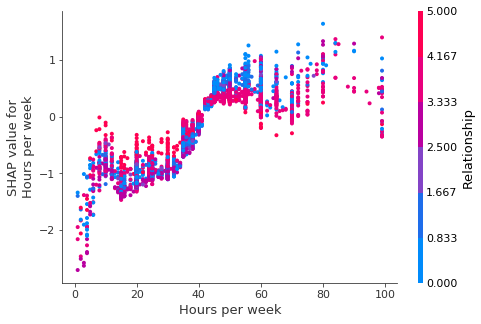

In [395]:
shap.dependence_plot('Hours per week', shap_values, features_test)

In [558]:
features_test.Race.value_counts()

4    7000
2     752
1     237
0      89
3      63
Name: Race, dtype: int64

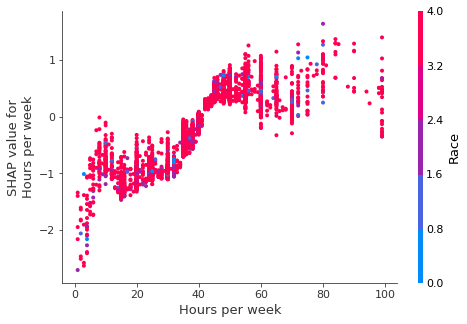

In [396]:
shap.dependence_plot('Hours per week', shap_values, features_test, interaction_index='Race')

In [561]:
select = range(20)
expected_value = explainer.expected_value

In [398]:
labels_test[10]

False

In [438]:
y_pred[10]

False

In [559]:
expected_value

-1.3272579

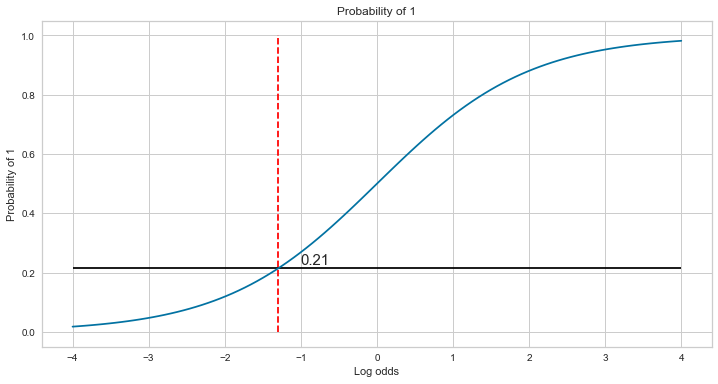

In [563]:
plot_log_odds(-1.3)

In [565]:
features_test.iloc[10]

Age               43.0
Workclass          6.0
Education-Num     13.0
Marital Status     4.0
Occupation        12.0
Relationship       0.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    42.0
Country           39.0
Name: 345, dtype: float64

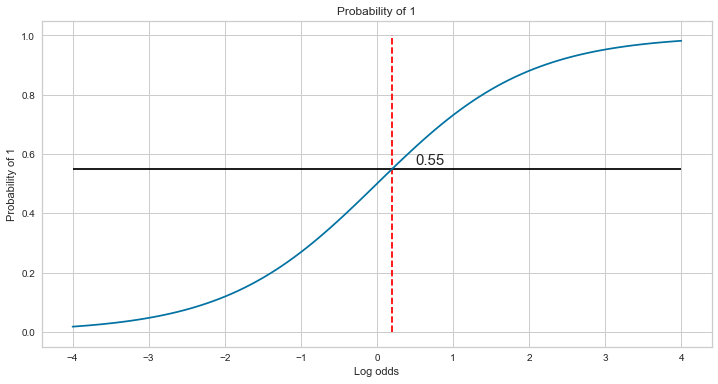

In [566]:
plot_log_odds(0.2)

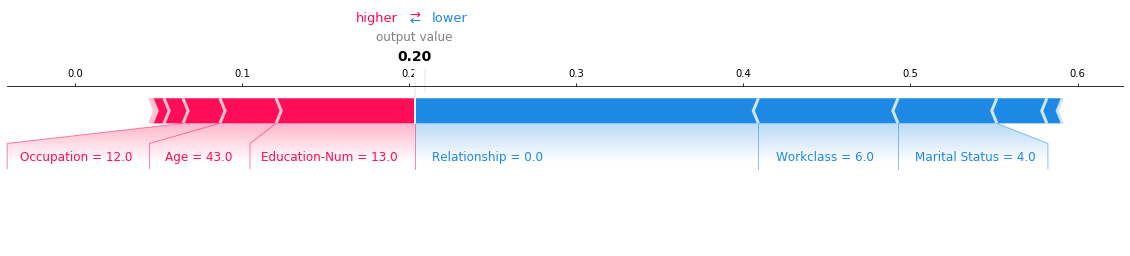

In [400]:
shap.force_plot(expected_value, shap_values[10], features_test.iloc[10], 
                link='logit', matplotlib=True)

# Occupation = 4 -> Sales
# 
# Maritial Status = 2 -> divorced
# Relationship = 4 -> Not-in-family
# Workclass = 4 Federal-gov

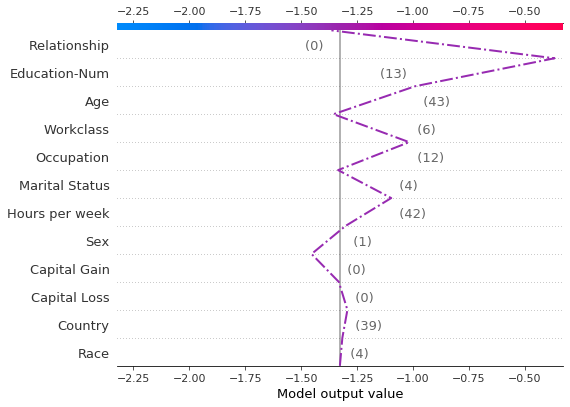

In [401]:
shap.decision_plot(expected_value, shap_values[10], features_test.iloc[10], highlight=0 )

# Check misclassifications

In [439]:
misclassified = np.where(labels_test != y_pred)[0]

In [571]:
labels_test[misclassified[1]]

False

In [572]:
y_pred[misclassified[1]]

True

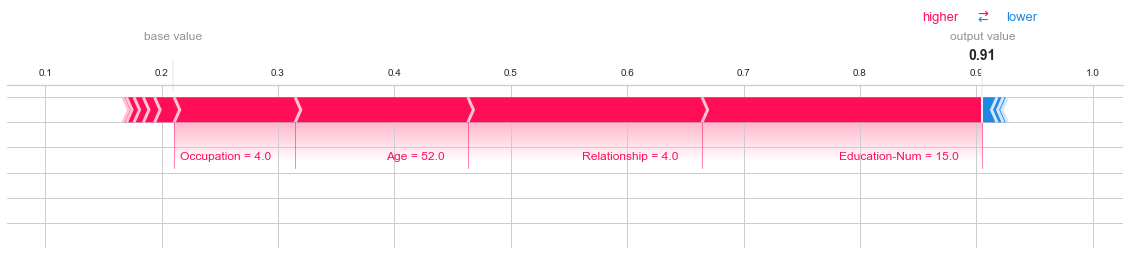

In [570]:
shap.force_plot(expected_value, shap_values[misclassified[1]], features_test.iloc[misclassified[1]], 
                link='logit', matplotlib=True)


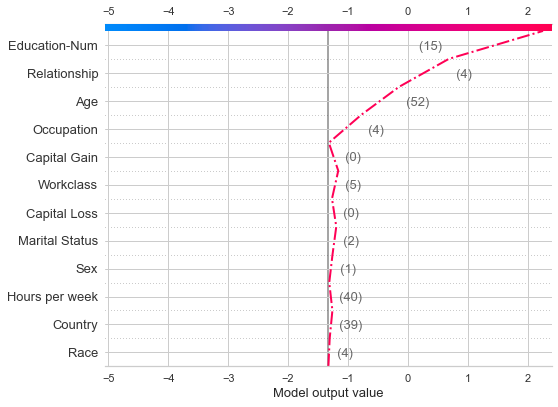

In [573]:
shap.decision_plot(expected_value, shap_values[misclassified[1]], features_test.iloc[misclassified[1]], highlight=0 )

In [444]:
from yellowbrick.classifier import ConfusionMatrix

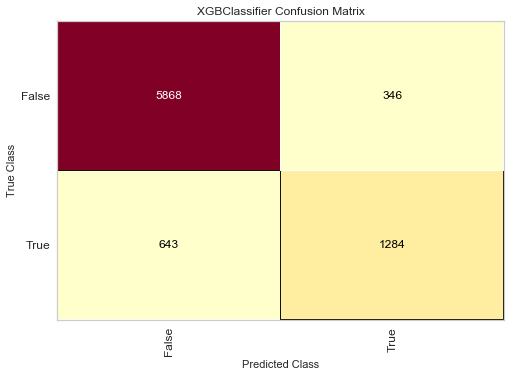

In [445]:
cm = ConfusionMatrix(model, )
cm.fit(features_train, labels_train)
cm.score(features_test, labels_test)
cm.show();

In [446]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(labels_test, model.predict(features_test)))

[[5868  346]
 [ 643 1284]]


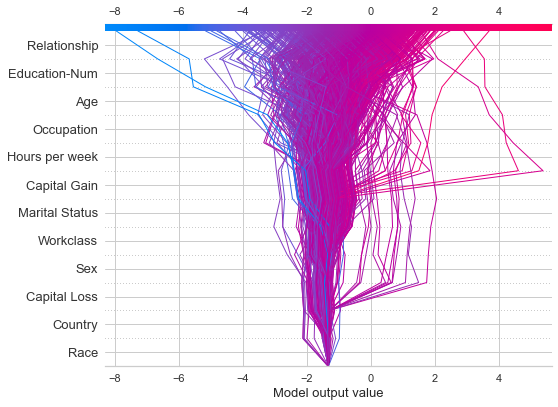

In [447]:
shap.decision_plot(expected_value, shap_values[misclassified], features_test.iloc[misclassified], )

In [468]:
shap.force_plot(expected_value, shap_values[misclassified], features_test.iloc[misclassified], link='logit')


In [473]:
yesclassified = np.where(labels_test == y_pred)[0][0:len(misclassified)]
shap.force_plot(expected_value, shap_values[yesclassified], features_test.iloc[yesclassified], link='logit')
